In [20]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [22]:
# Load the resumes dataset
data = pd.read_csv("CvDatasetFinal_3.csv")

In [23]:
data

,Category,Name,Email,Phone,Education,Skills,Experience,Experience_Rating
0,Data Science,Lauren Armstrong,lauren.armstrong@gmail.com,372.165.3732x4577,detail data science assurance associate data s...,skill programming language python panda numpy ...,24 month jquery 24 month python 24 monthscompa...,5
1,Data Science,Kristen Lambert,kristen.lambert@gmail.com,410.381.6487x49465,detail may 2013 may 2017 uitrgpv data scientis...,detail python,le 1 year month statsmodels 12 month aws le 1 ...,5
2,Data Science,Jason Montes,jason.montes@gmail.com,(962)653-8542x1217,detail january 2019 btech electrical electroni...,skill programming matlab python java labview p...,le 1 year month excel le 1 year month machine ...,5
3,Data Science,Molly Jackson,molly.jackson@gmail.com,110.048.2076x99778,detail january 2017 january 2018 pgdm business...,skill python sap hana tableau sap hana sql sap...,6 month retail 6 month retail marketing 6 mont...,5
4,Data Science,Michele Smith,michele.smith@gmail.com,(759)023-5239x309,detail mca ymcaust faridabad haryana data scie...,detail data structure,le 1 year month c le 1 year month data analysi...,5
...,...,...,...,...,...,...,...,...
525,Blockchain,Christopher Christensen,christopher.christensen@gmail.com,115-994-9195x4049,detail january 2014 january 2017 bachelorâs de...,detail blockchain,6 month smart contract 6 month dapps 6 month m...,3
526,Blockchain,Austin Hendricks,austin.hendricks@gmail.com,+1-675-858-6411x5800,detail january 2014 mtech computer engineering...,skill strong c fundamental problem solving eth...,16 month contract 12 month mysql 9 month aws 6...,4
527,Blockchain,Patrick Fernandez,patrick.fernandez@gmail.com,+1-012-721-2305,detail january 2017 computer engineering pune ...,skill programing language c c python apex visu...,6 month apex 6 month c 6 month crm 6 month cus...,3
528,Blockchain,Beth Villa,beth.villa@gmail.com,+1-958-050-0420x817,detail 2 high school diploma government woman ...,skill language c c java operating system windo...,19 month cs 12 month html 12 month javascript ...,5


In [24]:
# Get job skills as a list of strings
texts = data["Skills"].tolist()

In [25]:
# Load SentenceTransformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [26]:
# Encode skills as sentence embeddings
embeddings = model.encode(texts)

In [27]:
# Perform clustering with KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [28]:
# Get cluster assignments
cluster_assignments = kmeans.labels_

In [29]:
# Print results
for i in range(num_clusters):
    cluster = [j for j, c in enumerate(cluster_assignments) if c == i]
    print(f"Cluster {i}: {len(cluster)} skills")
    print(data.iloc[cluster]["Skills"].tolist())
    print("\n")

Cluster 0: 112 skills
['skill 1 team leading 2 selfmotivated 3 hard working strength ready learn new programming language punctual discipline respectfulness declaration hereby inform statement made true best knowledge belief detail august 2014 july 2017 mca computer sciene amravati maharashtra sgbau amaravti java web developer detail core javajspservletspringhibernatestrutsjavascript', 'skill language java operating system window linux centos 66 database oracle sql derby embedded db ide eclipse oxygen tool sonarqube putty responsibilitis participated requirement gathering design development meeting reviewed code debugged error improve performance coordinated system partner finalize design confirm requirement consistently met deadline requirement production work order collaborated developer identify alleviate number bug software provided maintenance development bug fix patch set existing application detail bachelor engineering computer savitribai phule pune university java developer jav

In [30]:
# Print cluster assignments
print("Cluster assignments:")
print(cluster_assignments)

Cluster assignments:
[2 2 3 3 1 3 2 2 3 1 2 2 3 3 1 3 2 2 3 1 2 2 3 3 1 3 2 2 3 1 2 2 3 3 1 3 2
 2 3 1 3 3 3 4 3 3 3 3 4 3 3 3 3 4 3 3 3 3 4 3 3 3 3 4 3 3 3 3 4 3 3 3 3 4
 3 3 3 3 4 3 3 3 3 4 3 4 3 3 4 3 1 3 3 4 3 4 3 0 0 4 3 3 4 3 1 3 3 4 3 4 3
 0 0 4 3 3 4 3 1 3 3 4 3 4 3 0 0 4 3 3 4 3 1 3 3 4 3 4 3 0 0 4 3 3 4 3 1 3
 3 4 3 4 3 0 0 4 3 3 4 3 1 3 3 4 3 4 3 0 0 3 1 1 3 0 0 3 1 1 3 0 0 3 1 1 3
 0 0 3 1 1 3 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 3 2 1
 2 2 2 3 2 1 2 2 2 3 2 1 2 2 2 3 2 1 2 2 2 3 2 1 2 2 2 3 2 1 2 2 2 3 2 1 2
 2 2 3 2 1 2 2 2 3 1 3 3 3 2 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3
 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 0 0 0 1 1 0 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 2 3 3 2 3 3 3 1 0 0 0 2 3 3 2 3 3 3 1 0 0 0
 2 3 3 2 3 3 3 1 0 0 0 0 1 0 3 3 0 0 0 1 0 3 3 0 0 0 1 0 3 3 0 0 0 1 0 3 3
 0 0 0 1 0 3 3 0 0 0 1 0 3 3 0 1 0 1 3 3 1 0 1 3 3 1 0 1 3 3 1 0 1 3 3 1 0
 1 3 3 1 0 1 3 3 1 0 1 3 3 1 0 1 3 3 3 2 0 0 1 3 3 3 2 0 0 1 3 3 3 2 0 0 1
 3 3

In [31]:
# Print score
print("Score:", kmeans.inertia_)

Score: 29750.43359375


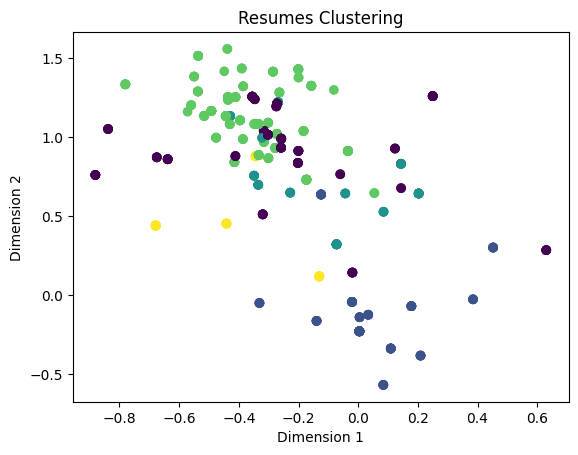

In [32]:
import matplotlib.pyplot as plt
# Create scatter plot
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_assignments)
plt.title("Resumes Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

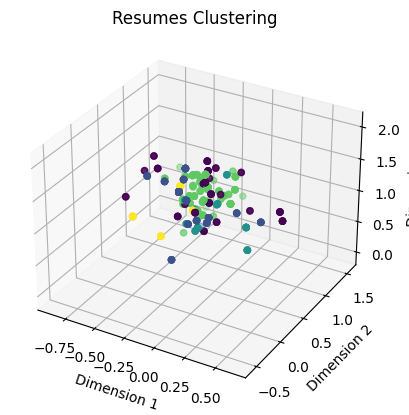

In [34]:
# Create scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=cluster_assignments)
ax.set_title("Resumes Clustering")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()


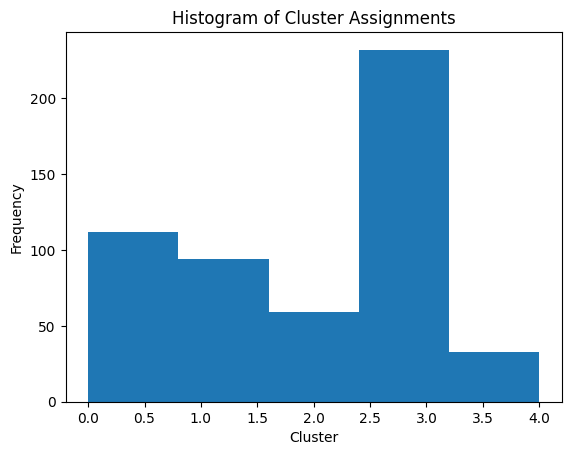

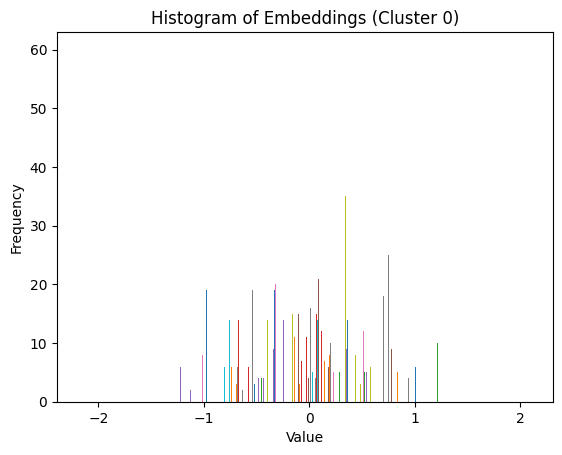

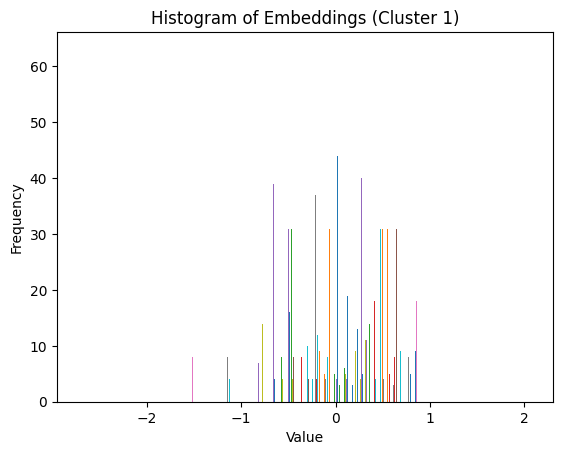

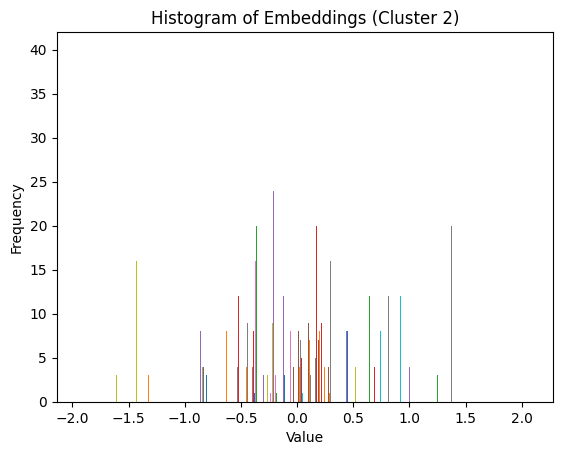

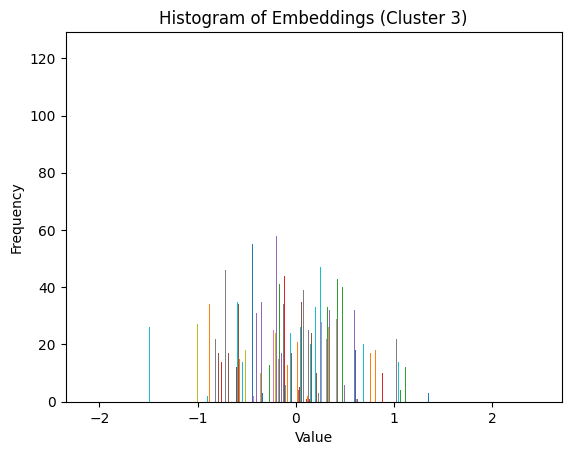

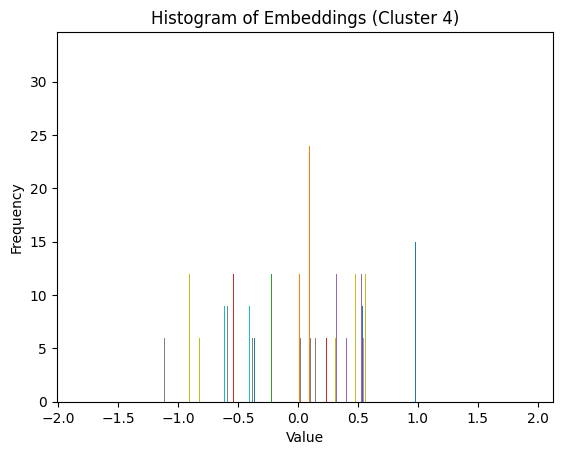

In [35]:
import matplotlib.pyplot as plt

# Create histograms of cluster assignments
plt.hist(cluster_assignments, bins=num_clusters)
plt.title("Histogram of Cluster Assignments")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show()

# Create histograms of embeddings within each cluster
for i in range(num_clusters):
    cluster = [j for j, c in enumerate(cluster_assignments) if c == i]
    plt.hist(embeddings[cluster], bins=50)
    plt.title(f"Histogram of Embeddings (Cluster {i})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()